# Visualizacion de datos sobre jugadores de futbol del año 2021 y analisis de resultados
### Autores: Albert Omar Araya Cory y José Antonio Aguilar Fernadez

## Importamos las librerias necesarias

In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from TeamClass import Team

## DataSet de Jugadores de futbol fifa 2021
#### Cargamos el DataSet que ya normalizamos

In [2]:
path = 'Datasets'
players_dataset = pd.read_csv(path + '/OficialDataSet2020.csv',encoding="ISO-8859-1")
players_dataset = players_dataset.drop({'Unnamed: 0'},axis = 1)
players_dataset.head()

,sofifa_id,first_position,second_position,third_position,hits,team,height_cm,weight_kg,value_eur,wage_eur,...,shooting,passing,dribbling,defending,physic,name,age,nationality,potential,overall
0,158023,ST,CF,RW,299,FC Barcelona,170,72,95.5,565.0,...,92.0,92.0,96.0,39.0,66.0,L. Messi,33,Argentina,94,94
1,20801,ST,LW,NaN,276,Juventus,187,83,58.5,405.0,...,93.0,82.0,89.0,35.0,78.0,Cristiano Ronaldo,35,Portugal,93,93
2,190871,CAM,LW,NaN,186,Paris Saint-Germain,175,68,105.5,290.0,...,85.0,87.0,95.0,32.0,58.0,Neymar Jr,28,Brazil,92,92
3,203376,CB,NaN,NaN,127,Liverpool,193,92,78.0,200.0,...,60.0,70.0,71.0,90.0,86.0,V. van Dijk,29,Netherlands,92,91
4,200389,GK,NaN,NaN,47,AtlÃÂ©tico Madrid,188,87,77.5,125.0,...,NaN,NaN,NaN,NaN,NaN,J. Oblak,27,Slovenia,93,91


## Definiendo funciones para encontrar al mejor y al peor jugador de un equipo

In [4]:
def searchJuanTeam(team,pos):
    Juan = team[team.first_position == pos][team.potential==team.potential[team.first_position == pos].min()]
    return Juan
def searchBestPlayer(team,pos):
    BestPlayer = team[team.first_position == pos][team.potential==team.potential[team.first_position == pos].max()]
    return BestPlayer

# Visualizacion del DataSet
## a) Gráfico de comparación entre el potencial y el valor del jugador en euros
#### Seleccionamos los jugadores que tengan un potencial arriba de 80 y vemos el valor que tienen segun su potencial

Text(0.5, 1.0, 'Valor del Jugador segun potencial')

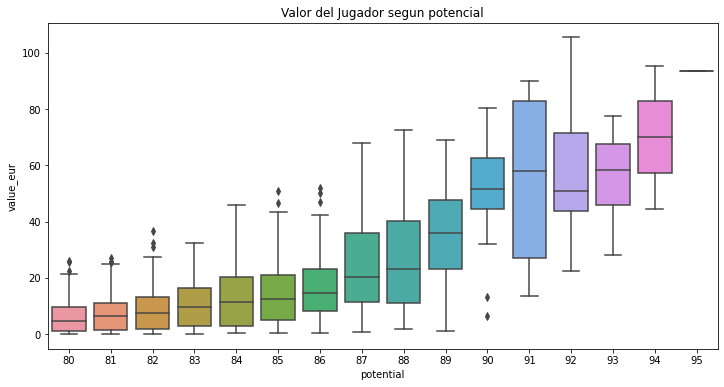

In [8]:
x = players_dataset.potential[players_dataset.potential>=80]
y = players_dataset.value_eur[players_dataset.potential>=80]
plt.figure(figsize=(12,6))
sns.boxplot(x,y)
plt.title('Valor del Jugador segun potencial')

### Observaciones.-
#### En el gráfico podemos observar que existen jugadores que estan valuados de una maneraq erronea ya que algunos valen mas pero no tiene el mayor potencial. 

## b) Gráfico de comparación entre el potencial y el sueldo del jugador por temporada
#### Seleccionamos los jugadores que tengan un potencial arriba de 80 y vemos el valor que tienen segun su potencial

Text(0.5, 1.0, 'Salario del Jugador segun potencial')

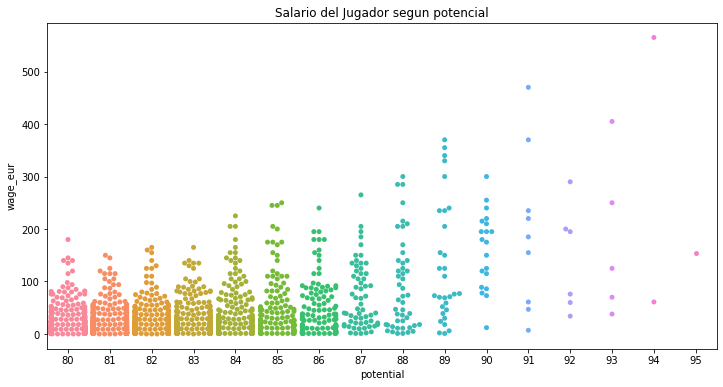

In [9]:
x = players_dataset.potential[players_dataset.potential>=80]
y = players_dataset.wage_eur[players_dataset.potential>=80]
plt.figure(figsize=(12,6))
sns.swarmplot(x,y)
plt.title('Salario del Jugador segun potencial')

### Observaciones.-
#### Podemos observar que existen algunas anomalias en la visualización de los datos, en primer lugar existen jugadores que perciben un sueldo mayor teniendo un potencial menor que el de otros jugadores. Estos datos reflejan que existen jugadores sobrevalorados en el mercado

## c) Gráfico de comparación entre la posición el sueldo de los jugadores
#### Seleccionamos los jugadores que tengan un potencial arriba de 80 y vemos el valor que tienen segun su posición

Text(0.5, 1.0, 'Salario de los jugador segun su posicion')

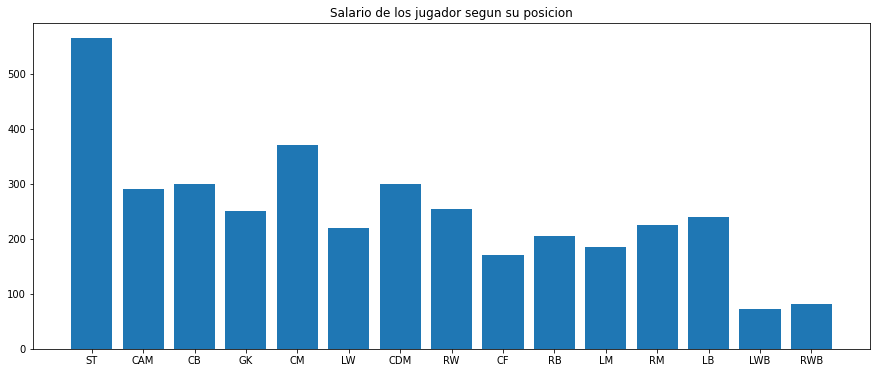

In [28]:
y = players_dataset.wage_eur[players_dataset.potential>=80]
x = players_dataset.first_position[players_dataset.potential>=80]
plt.figure(figsize=(15,6))
plt.bar(x,y)
plt.title('Salario de los jugador segun su posicion')

### Observaciones.-
#### Según el gráfico podemos ver que los delanteros son los mejores pagados en las plantillas seguidos de los volantes de creación.

# Analisis de la composición de un equipo de futbol

Text(0.5, 1.0, 'Potencial del jugador y su posicion')

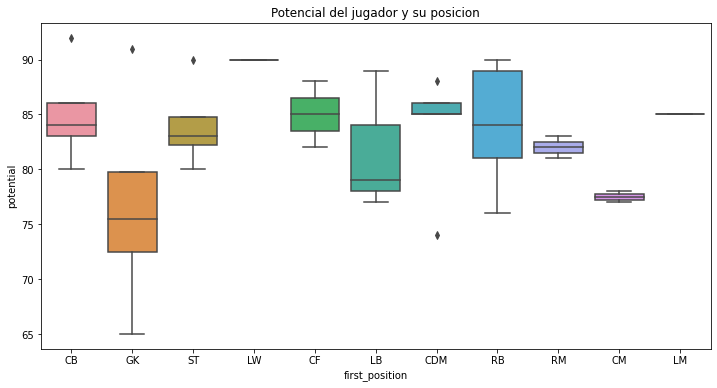

In [36]:
name = 'Liverpool'
players_team = players_dataset[players_dataset.team == name]
y = players_team.potential
x = players_team.first_position
plt.figure(figsize=(12,6))
sns.boxplot(x,y)
plt.title('Potencial del jugador y su posición')

### Observaciones.-
#### Según el gráfico de cajas podemos ver que existen jugadores en la plantilla que tienen un potencial muy bajo y que estos datos podrian servir para la toma de desiciones de los ejecutivos del club.
## Encontramos al peor jugador de la plantilla y mostramos sus datos técnicos

In [34]:
pos = 'GK'
worst = searchJuanTeam(players_team,pos)
worst[['name','nationality','first_position','potential','value_eur','wage_eur']]

,name,nationality,first_position,potential,value_eur,wage_eur
10562,A. Lonergan,England,GK,65,0.15,8.0


# Aplicación de una regreción lineal

## a) Declaramos la hipotesis 

In [238]:
def h(X,theta):
    return np.dot(np.transpose(theta),X)

## b) Declaramos la función de costo

In [165]:
def J(X,y,theta):
    m = X.shape[1]
    return (1/(2*m))*np.sum(np.square(h(X,theta)-y))

## c) Declaramos la derivada de la función de costo

In [166]:
def dJ(X,y,theta):
    m=X.shape[1]
    return (1/m)*np.dot((h(X,theta)-y),np.transpose(X)).reshape((-1,1))

## d) Declaramos x como la columna que almacenara los valores de los jugadores y de como el potencial de los mismos

In [291]:
x = players_dataset[['value_eur']]
y = players_dataset.potential
x.to_numpy()
y.to_numpy()
y = np.array(y).reshape(1,-1)
x = np.array(x).reshape(1,-1)

In [293]:
print(x.shape)
print(y.shape)

(1, 14977)
(1, 14977)


In [294]:
np.mean(x,axis=1)

array([2.90342826])

In [295]:
np.std(x,axis=1)

array([6.06094425])

In [314]:
m=x.shape[1]
unos = np.ones((1,m))
X=np.append(unos,x,axis=0)

In [297]:
X.shape

(2, 14977)

## e) Declaramos alpha y las iteraciones del modelo 

In [315]:
alpha = 0.01
iterations = 400

## f) Declaramos theta

In [316]:
theta = np.random.random((X.shape[0],1))
theta

array([[0.3608039 ],
       [0.16574341]])

## g) Obtenemos el costo inicial  

In [317]:
registro_grads = []
registro_J = []
J_init = J(X,y,theta)
print(f'Costo inicial:{J_init}')

Costo inicial:2553.8299417459943


## h) Obtenemos el costo final 

In [318]:
for i in range(iterations):
    dtheta = dJ(X,y,theta)
    theta = theta-alpha*dtheta
    registro_J.append(J(X,y,theta))
print(f'Costo Final:{J(X,y,theta)}')

Costo Final:14.988495164056102


## i) Visualizacion de la curva 

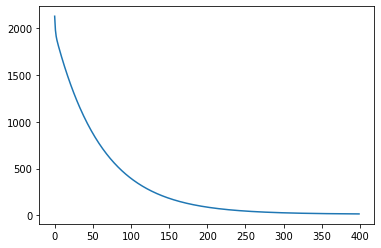

In [319]:
it = list(range(iterations))
plt.plot(it,registro_J)
plt.show()

# Visualización de datos para una tarea de detección de anomalias

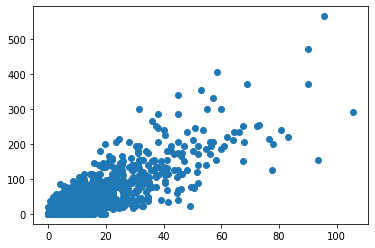

In [327]:
x = players_dataset.value_eur[players_dataset.potential>=75]
y = players_dataset.wage_eur[players_dataset.potential>=75]
plt.scatter(x,y)

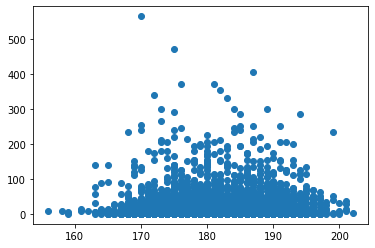

In [348]:
y = players_dataset.wage_eur[players_dataset.potential>=75]
x = players_dataset.height_cm[players_dataset.potential>=75]
plt.scatter(x,y)

# Visualización de datos para una tarea de clustering

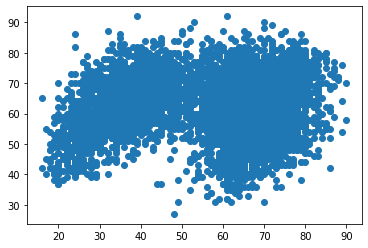

In [330]:
x = players_dataset.defending[players_dataset.potential>=75]
y = players_dataset.passing[players_dataset.potential>=75]
plt.scatter(x,y)

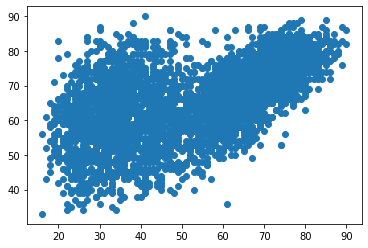

In [331]:
x = players_dataset.defending[players_dataset.potential>=75]
y = players_dataset.physic[players_dataset.potential>=75]
plt.scatter(x,y)

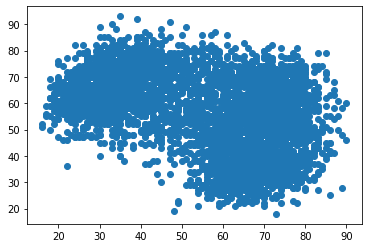

In [335]:
x = players_dataset.defending[players_dataset.potential>=75]
y = players_dataset.shooting[players_dataset.potential>=75]
plt.scatter(x,y)